In [52]:
import pandas as pd
import numpy as np
import pickle

In [53]:
df = pd.read_csv('/content/CTG - New data.csv')

# New Section

In [54]:
df.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,ND
0,S0001101.dat,01-02-1997,CTG1562.txt,1731,2741,144,144,2,0,5,...,0,0,0,1,0,0,0,0,6,1
1,S0001101.dat,01-02-1997,CTG1563.txt,1920,2403,144,144,0,0,2,...,0,0,0,0,1,0,0,0,7,1
2,S0001101.dat,01-02-1997,CTG1564.txt,2110,3120,144,144,3,0,6,...,0,0,0,0,0,0,0,0,2,1
3,S0001101.dat,01-02-1997,CTG1565.txt,2446,3120,144,144,2,0,5,...,0,0,0,0,0,0,0,0,2,1
4,S0001101.dat,01-02-1997,CTG1566.txt,2700,3599,144,144,4,0,5,...,0,0,0,0,0,0,0,0,2,1


In [55]:
## we will be dropping several columns from the dataset that we will not be using
## b->start time
## e->end time
## since these are not required for our objective

In [56]:
df.drop(['FileName','Date','SegFile','b','e','ASTV','MSTV','ALTV','ALTV','MLTV','Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode',
       'Mean', 'Median', 'Variance', 'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD',
       'DE', 'LD', 'FS', 'SUSP', 'CLASS'],axis=1,inplace=True)

In [57]:
df.head()

,LBE,LB,AC,FM,UC,DL,DS,DP,DR,ND
0,144,144,2,0,5,1,0,0,0,1
1,144,144,0,0,2,1,0,0,0,1
2,144,144,3,0,6,0,0,0,0,1
3,144,144,2,0,5,0,0,0,0,1
4,144,144,4,0,5,0,0,0,0,1


In [58]:
df.columns

Index(['LBE', 'LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'DR', 'ND'], dtype='object')

In [59]:
df.isnull().sum()

LBE    0
LB     0
AC     0
FM     0
UC     0
DL     0
DS     0
DP     0
DR     0
ND     0
dtype: int64

In [60]:
df = df.dropna()

In [61]:
df.isnull().sum()

LBE    0
LB     0
AC     0
FM     0
UC     0
DL     0
DS     0
DP     0
DR     0
ND     0
dtype: int64

In [62]:
X = df[['LBE','LB','AC','FM','UC','DL','DS','DP','DR']] #independent values
Y = df[['ND']] #dependent values

In [63]:
from sklearn.preprocessing import StandardScaler
Scalar = StandardScaler()
X = Scalar.fit_transform(X)

In [64]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [65]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score, recall_score, hinge_loss
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           1       0.76      0.75      0.76        91
           2       0.77      0.79      0.78        98

    accuracy                           0.77       189
   macro avg       0.77      0.77      0.77       189
weighted avg       0.77      0.77      0.77       189



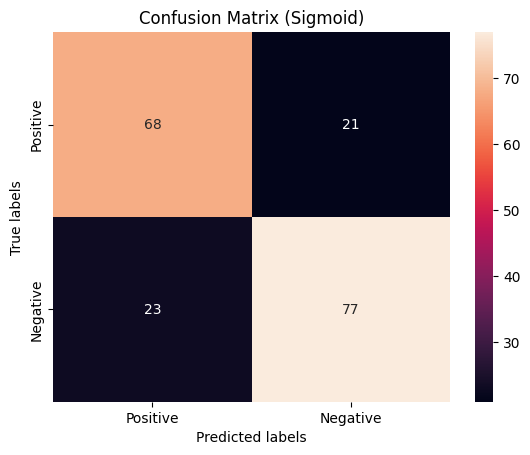

In [66]:
from sklearn.svm import SVC

svm_clf=SVC(kernel="sigmoid")
svm_clf=svm_clf.fit(X_train,y_train)
y_pred=svm_clf.predict(X_test)

print(classification_report(y_pred,y_test))

c=confusion_matrix(y_test,y_pred)

ax= plt.subplot()
sns.heatmap(c, annot=True, fmt='g', ax=ax);  

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix (Sigmoid)'); 
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9206349206349206
              precision    recall  f1-score   support

           1       0.91      0.92      0.92        88
           2       0.93      0.92      0.93       101

    accuracy                           0.92       189
   macro avg       0.92      0.92      0.92       189
weighted avg       0.92      0.92      0.92       189



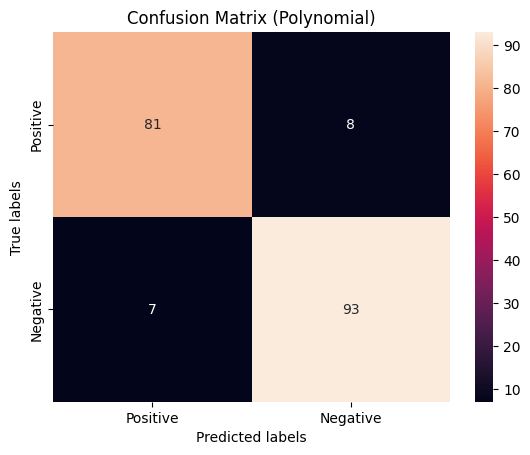

In [67]:
svm_clf=SVC(C=0.1,kernel="poly", degree=6, gamma=0.1, coef0=5)
svm_clf=svm_clf.fit(X_train,y_train)
y_pred=svm_clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_pred,y_test))

c=confusion_matrix(y_test,y_pred)

ax= plt.subplot()
sns.heatmap(c, annot=True, fmt='g', ax=ax);  

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix (Polynomial)'); 
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8359788359788359
              precision    recall  f1-score   support

           1       0.93      0.77      0.84       108
           2       0.75      0.93      0.83        81

    accuracy                           0.84       189
   macro avg       0.84      0.85      0.84       189
weighted avg       0.85      0.84      0.84       189



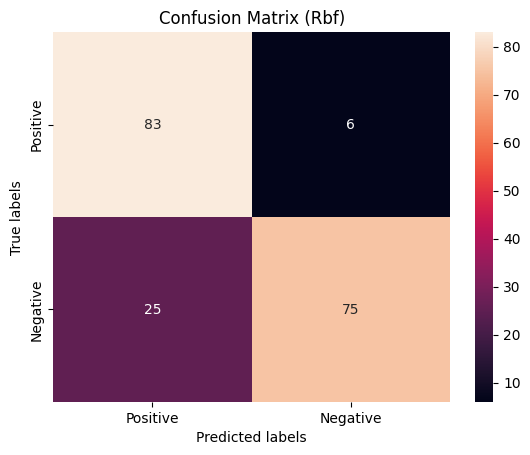

In [68]:
svm_clf=SVC(C=10,kernel="rbf",gamma=10)
svm_clf=svm_clf.fit(X_train,y_train)
y_pred=svm_clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_pred,y_test))

c=confusion_matrix(y_test,y_pred)

ax= plt.subplot()
sns.heatmap(c, annot=True, fmt='g', ax=ax);  

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix (Rbf)'); 
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8571428571428571
              precision    recall  f1-score   support

           1       0.78      0.91      0.84        76
           2       0.93      0.82      0.87       113

    accuracy                           0.86       189
   macro avg       0.85      0.87      0.85       189
weighted avg       0.87      0.86      0.86       189



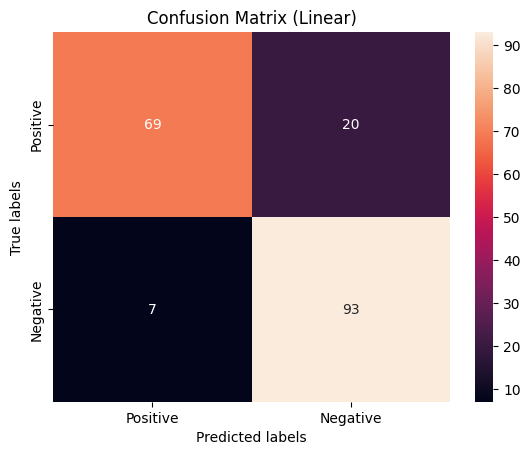

In [69]:
svm_clf=SVC(C=1,kernel="linear",gamma=0.5)
svm_clf=svm_clf.fit(X_train,y_train)
y_pred=svm_clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_pred,y_test))

c=confusion_matrix(y_test,y_pred)

ax= plt.subplot()
sns.heatmap(c, annot=True, fmt='g', ax=ax);  

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix (Linear)'); 
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);


In [70]:
fn = 'svm_poly.sav'
pickle.dump(svm_clf,open(fn,'wb'))

In [71]:
arr = [139.0, 139.0, 1.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0]
feature = np.array(arr)
res = svm_clf.predict(feature.reshape(1,-1))
print(res)

[2]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           1       0.89      0.90      0.89        88
           2       0.91      0.90      0.91       101

    accuracy                           0.90       189
   macro avg       0.90      0.90      0.90       189
weighted avg       0.90      0.90      0.90       189

0.8994708994708994


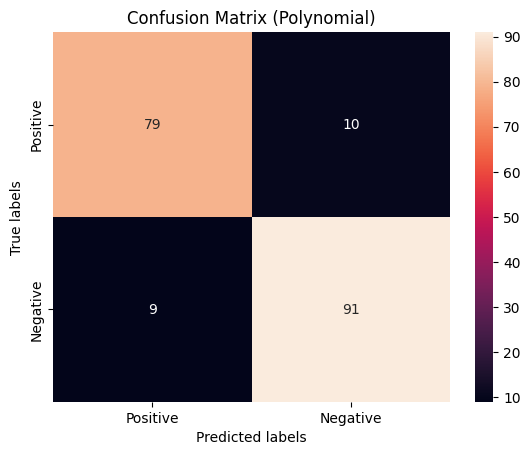

In [72]:
from sklearn.svm import SVC

svm_clf=SVC(kernel="poly", degree=6, gamma=0.1, coef0=5, C=.5)
svm_clf=svm_clf.fit(X_train,y_train)
y_pred=svm_clf.predict(X_test)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_test,y_pred))
c=confusion_matrix(y_test,y_pred)

ax= plt.subplot()
sns.heatmap(c, annot=True, fmt='g', ax=ax);  

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix (Polynomial)'); 
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);